In [66]:
import pandas as pd
import numpy as np
import glob
import tldextract
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
import gensim.corpora as corpora
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/meftahzi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
news = pd.DataFrame()
DATA_FILES = ['us_part1/newspaper.json','us_part2/newspaper.json' ]
for filepath in DATA_FILES:
    current_news = pd.read_json(filepath, lines=True)
    current_news['country'] = filepath[:2]
    news = news.append(current_news)
    

news.reset_index(inplace=True, drop=True)
news.head()

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,country
0,Here’s a full list of the 23 Friendly’s locati...,Friendly’s has closed 23 more restaurants arou...,None,[https://www.bostonglobe.com/resizer/thx4EmqY-...,None,en,[],GER_2019-04-08_5182_web_page.html,www.bostonglobe.com/business/2019/04/08/here-f...,NaN,us
1,Yahoo,Yahoo makes it easy to enjoy what matters most...,None,[https://s.yimg.com/rz/d/yahoo_frontpage_maste...,None,None,[],GER_2019-04-08_5398_web_page.html,mail.yahoo.com/,NaN,us
2,Yahoo,Yahoo makes it easy to enjoy what matters most...,None,[https://s.yimg.com/rz/d/yahoo_frontpage_maste...,None,None,[],GER_2019-04-08_5399_web_page.html,mail.yahoo.com/d/folders/1,NaN,us
3,Yahoo,Yahoo makes it easy to enjoy what matters most...,None,[https://s.yimg.com/rz/d/yahoo_frontpage_maste...,None,None,[],GER_2019-04-08_5400_web_page.html,mail.yahoo.com/d/folders/1/messages/ALz5kEB7K0...,NaN,us
4,Yahoo,Yahoo makes it easy to enjoy what matters most...,None,[https://s.yimg.com/rz/d/yahoo_frontpage_maste...,None,None,[],GER_2019-04-08_5401_web_page.html,mail.yahoo.com/d/folders/1/messages/AFokDMRyBc...,NaN,us


In [68]:
news = news[(news['meta_lang'] == 'en') | (news['meta_lang'].isnull())] #select only articles with 'en' meta_lang or with empty

In [69]:
len(news)

863167

In [70]:
news

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,country
0,Here’s a full list of the 23 Friendly’s locati...,Friendly’s has closed 23 more restaurants arou...,None,[https://www.bostonglobe.com/resizer/thx4EmqY-...,None,en,[],GER_2019-04-08_5182_web_page.html,www.bostonglobe.com/business/2019/04/08/here-f...,NaN,us
1,Yahoo,Yahoo makes it easy to enjoy what matters most...,None,[https://s.yimg.com/rz/d/yahoo_frontpage_maste...,None,None,[],GER_2019-04-08_5398_web_page.html,mail.yahoo.com/,NaN,us
2,Yahoo,Yahoo makes it easy to enjoy what matters most...,None,[https://s.yimg.com/rz/d/yahoo_frontpage_maste...,None,None,[],GER_2019-04-08_5399_web_page.html,mail.yahoo.com/d/folders/1,NaN,us
3,Yahoo,Yahoo makes it easy to enjoy what matters most...,None,[https://s.yimg.com/rz/d/yahoo_frontpage_maste...,None,None,[],GER_2019-04-08_5400_web_page.html,mail.yahoo.com/d/folders/1/messages/ALz5kEB7K0...,NaN,us
4,Yahoo,Yahoo makes it easy to enjoy what matters most...,None,[https://s.yimg.com/rz/d/yahoo_frontpage_maste...,None,None,[],GER_2019-04-08_5401_web_page.html,mail.yahoo.com/d/folders/1/messages/AFokDMRyBc...,NaN,us
...,...,...,...,...,...,...,...,...,...,...,...
877028,Yahoo – Anmeldung,None,None,[https://s.yimg.com/wm/mbr/images/yahoo-favico...,None,None,[],GER_2019-06-15_7822_mobile_.html,mail.yahoo.com/neo/m/launch;_ylc=X3oDMTBvaGpwZ...,NaN,us
877029,Yahoo – Anmeldung,None,None,[https://s.yimg.com/wm/mbr/images/yahoo-favico...,None,None,[],GER_2019-06-15_7823_mobile_.html,mail.yahoo.com/neo/m/launch;_ylc=X3oDMTBvaGpwZ...,NaN,us
877030,Yahoo – Anmeldung,None,None,[https://s.yimg.com/wm/mbr/images/yahoo-favico...,None,None,[],GER_2019-06-15_7825_mobile_.html,mail.yahoo.com/neo/m/launch;_ylc=X3oDMTBvdGlyN...,NaN,us
877031,Yahoo – Anmeldung,None,None,[https://s.yimg.com/wm/mbr/images/yahoo-favico...,None,None,[],GER_2019-06-15_7826_mobile_.html,mail.yahoo.com/neo/m/message?search=1&s=gWC1Bu...,NaN,us


In [71]:
import tldextract
news['domain'] = news['url'].apply (lambda row: tldextract.extract(row).domain+"."+tldextract.extract(row).suffix)
news['subdomain'] = news['url'].apply (lambda row: tldextract.extract(row).subdomain)

In [72]:
#list with media domains
domains_path = '../iboeckmann/webtracking_analysis/parsing/data/domaincodes/domaincodes.csv'
news_domains = pd.read_csv(domains_path)
news_domains

,domain,type,comm_pol
0,dailymail.co.uk,Tabloid newspaper,NaN
1,rai.it,Public broadcaster,NaN
2,reuters.com,Quality newspaper/magazine,NaN
3,abc.es,Quality newspaper/magazine,NaN
4,20minutos.es,Tabloid newspaper,NaN
...,...,...,...
537,resistancerepublicaine.eu,Hyperpartisan media,NaN
538,paris-normandie.fr,Quality newspaper/magazine,NaN
539,epochtimes.fr,Hyperpartisan media,NaN
540,epochtimes.de,Hyperpartisan media,NaN


In [73]:
#checking how many unique domains in the uk dataset
print(len(news.domain.unique()))
news.domain.unique()

350


array(['bostonglobe.com', 'yahoo.com', 'cnn.com', 'msn.com', 'nypost.com',
       'cbslocal.com', 'nbc.com', 'cbsnews.com', 'foxnews.com',
       'sun-sentinel.com', 'deviantart.net', 'sfgate.com',
       'realclearpolitics.com', 'nytimes.com', 'lifesitenews.com',
       'windowscentral.com', 'abc7chicago.com', 'worldjusticenews.com',
       'dailykos.com', 'newyorker.com', 'fox.com', 'theguardian.com',
       'buzzfeed.com', 'feedly.com', 'rollingstone.com', 'news12.com',
       'bbc.com', 'cheezburger.com', 'latimes.com', 'indiatimes.com',
       'forbes.com', 'npr.org', 'thehill.com', 'awm.com', 'bbc.co.uk',
       'vice.com', 'cbc.ca', 'breitbart.com', 'thedailybeast.com',
       'thehornnews.com', 'dailyconservative.com', 'wnd.com',
       'gamespot.com', 'miamiherald.com', 'thetimes.co.uk',
       'dailymail.co.uk', 'washingtonexaminer.com', 'nbcnews.com',
       'diariolibre.com', 'roughlyexplained.com', 'washingtonpost.com',
       'cnbc.com', 'democratandchronicle.com', 'huffp

In [74]:
#how many of those unique urls are recognised newspapers ?
print(len(set(news.domain.unique()).intersection(set(news_domains.domain))))
set(news.domain.unique()).intersection(set(news_domains.domain))

214


{'10tv.com',
 '6abc.com',
 'abc.es',
 'abc.net.au',
 'abc13.com',
 'abc15.com',
 'abc7.com',
 'abc7chicago.com',
 'abc7ny.com',
 'abcactionnews.com',
 'abcn.ws',
 'aljazeera.com',
 'apnews.com',
 'arcamax.com',
 'arte.tv',
 'atresplayer.com',
 'baltimoresun.com',
 'bbc.co.uk',
 'bbc.com',
 'bloomberg.com',
 'boston25news.com',
 'bostonglobe.com',
 'breitbart.com',
 'businessinsider.com',
 'buzzfeed.com',
 'buzzfeednews.com',
 'canarias7.es',
 'cbc.ca',
 'cbs.com',
 'cbsloc.al',
 'cbslocal.com',
 'cbsn.ws',
 'cbsnews.com',
 'ccma.cat',
 'channel4.com',
 'channel7breakingreport.live',
 'chicagotribune.com',
 'cnbc.com',
 'cnn.com',
 'cnn.it',
 'conservativebuzz.com',
 'conservativedailypost.com',
 'conservativeinstitute.org',
 'dailyconservative.com',
 'dailykos.com',
 'dailymail.co.uk',
 'dailyrecord.co.uk',
 'dailystar.co.uk',
 'dailywire.com',
 'dallasnews.com',
 'daytondailynews.com',
 'democratandchronicle.com',
 'denverpost.com',
 'diarioinformacion.com',
 'diariolibre.com',
 'diar

## Out of 542 possible domains, we found 214 in the uk dataset that had 350 total domains.

## Drop the Nan values from both 'text' and 'title' columns 

In [75]:
#filtering the unnecessary domains 
media_portals = news[news['domain'].isin(news_domains['domain'].values)]
media_portals=media_portals.dropna(subset=['text','title'])  
media_portals.reset_index(inplace=True, drop=True)

In [76]:
len(media_portals)

51156

## Checking the number of occurences of articles based on title and text seperately 

In [77]:
media_portals.title.value_counts().head(80)
media_portals.reset_index(inplace=True, drop=True)

In [78]:
text_counts = pd.DataFrame(media_portals.text.value_counts())
text_counts

,text
"BuzzFeed Reviews\n\nWe test and find the best products. No matter your budget, we got you covered.",1614
"Unfortunately, our website is currently unavailable in most European countries. We are engaged on the issue and committed to looking at options that support our full range of digital offerings to the EU market. We continue to identify technical compliance solutions that will provide all readers with our award-winning journalism.",948
"© Kos Media, LLC\n\nSite content may be used for any purpose withoutexplicit permission unless otherwise specified.""Kos"" and ""Daily Kos"" are registered trademarks ofKos Media, LLC.",814
"Sorry\n\nSorry, you clicked a link to an article that we no longer retain a link to. NewsNow retains a record of links to stories for 30 days, so it may be that the link you clicked is out of date. Please close this window and try clicking a link to another article.",774
"Before you continue...\n\nHuffPost is now part of the Oath family. We (Oath) and our partners need your consent to access your device, set cookies, and use your data, including your location, to understand your interests, provide relevant ads and measure their effectiveness. Oath will also provide relevant ads to you on our partners' products. Learn More\n\nHow Oath and our partners bring you better ad experiences To give you a better overall experience, we want to provide relevant ads that are more useful to you. For example, when you search for a film, we use your search information and location to show the most relevant cinemas near you. We also use this information to show you ads for similar films you may like in the future. Like Oath, our partners may also show you ads that they think match your interests. Learn more about how Oath collects and uses data and how our partners collect and use data.\n\nSelect 'OK' to allow Oath and our partners to use your data, or 'Manage options' to review our partners and your choices. Tip: Sign In to save these choices and avoid repeating this across devices. You can always update your preferences in the Privacy Centre.",700
...,...
4.\n\nTwo iced espresso shots mixed with a Premier Protein drink gives you your caffeine fix while also adding a little more protein to your diet.,1
"PALM COAST, Fla. - If you have seen one or both of these men, the Clay County Sheriff's Office wants to hear from you.\n\nThe agency is trying to identify the men because deputies believe they have pertinent information concerning crimes at the Middleburg WalMart.\n\nThey are believed to be traveling in a silver-colored sedan with a Tennessee license plate.\n\nIf you have any information about the men, who were caught on surveillance camera, you are asked to call 904-264-6512.\n\nDeputy C. Phillips is handling the case and is reminding everyone that can go also go to the Clay County Sheriff's Office website by clicking here then go to the See Something, Say Something banner to leave a crime tip.\n\nYou can also contact First Coast Crime Stoppers at 1-866-845-TIPS, and you may be eligible for a reward if a conviction is made in a case.\n\nCopyright 2019 by WJXT News4Jax - All rights reserved.",1
"Notre Dame’s structure is saved, French authorities announced Monday night, close to four hours after a massive blaze broke out at the top of the historic Gothic cathedral.\n\n“We can consider that the structure of Notre Dame has been saved and preserved,” said Paris fire brigade chief Jean-Claude Gallet, according to Agence France-Presse.\n\nThe 850-year-old building’s two main towers are also in the clear, Gallet added.\n\n“The fire has lowered in intensity. We can say that the structure is saved, notably the northern belfry,” said Deputy Interior Minister Laurent Nunez, according to Le Figaro.\n\nAbout two-thirds of the roof went up in smoke, as did the iconic spire, authorities said.\n\nPictures from inside the cathedral obtained by Reuters show fog and giant flames roaring. Another image shows firefighters gathered in 

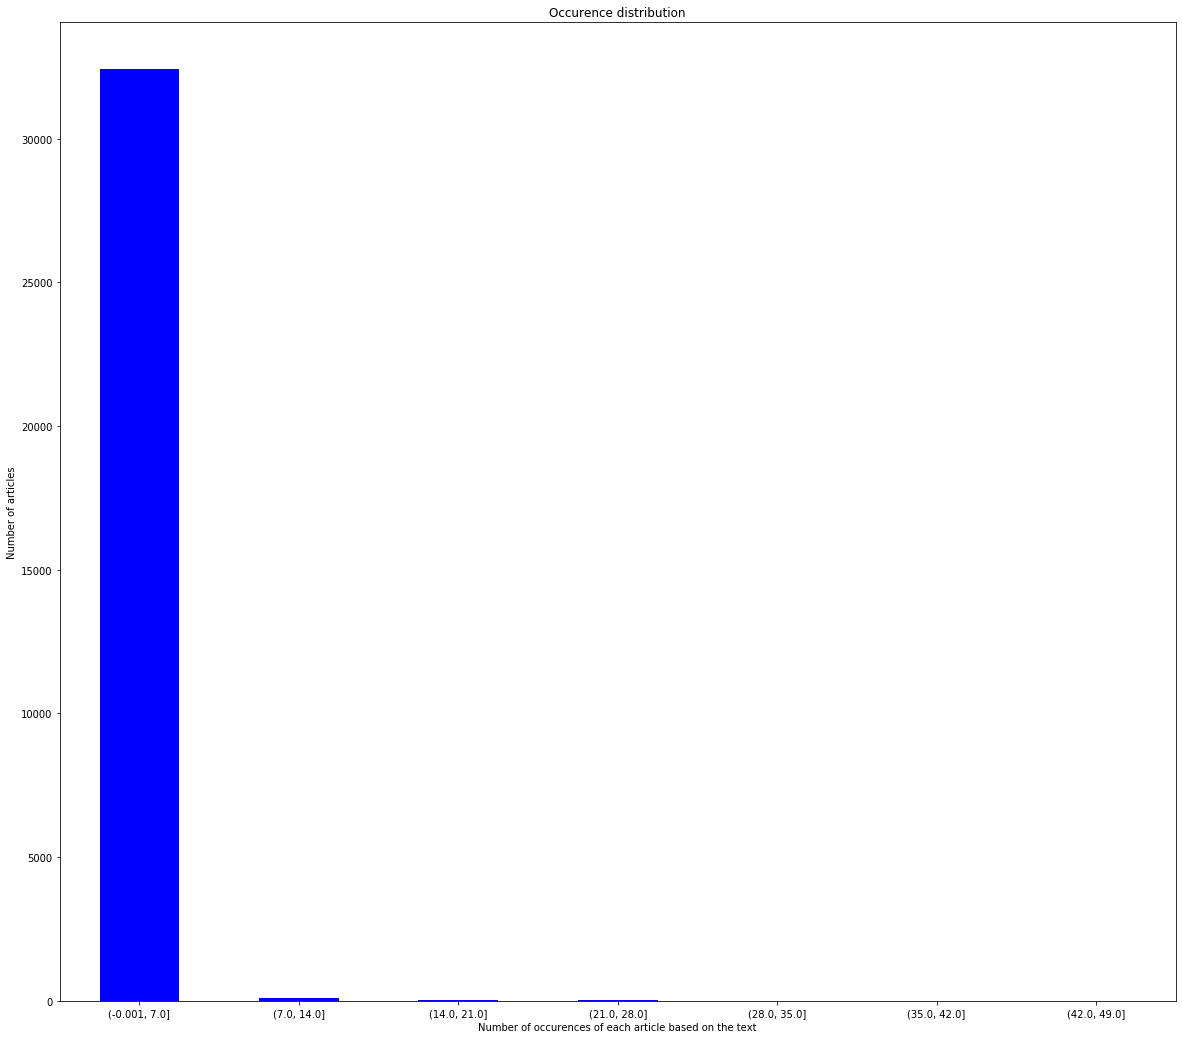

In [79]:
out = pd.cut(text_counts['text'], bins=list(range(0,50,7)), include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(20,18))
plt.ylabel('Number of articles')
plt.xlabel('Number of occurences of each article based on the text')
plt.title("Occurence distribution")
plt.show()

In [80]:
media_portals['txt_counts'] = media_portals['text'].map(media_portals['text'].value_counts())
media_portals['title_counts'] = media_portals['title'].map(media_portals['title'].value_counts())
print("the pearson correlation coefficient between the occurences of titles agaisnt occurences of texts is of " + str(media_portals['title_counts'].corr(media_portals['txt_counts'])))

the pearson correlation coefficient between the occurences of titles agaisnt occurences of texts is of 0.46493681771430473


In [81]:
criteria=7
s=media_portals[media_portals['txt_counts']<=criteria]
print("Number of articles with text occurence less than "+ str(criteria) +" :" + str(len(s)))
s=media_portals[media_portals['title_counts']<=criteria]
print("Number of articles with title occurence less than "+ str(criteria) +" :" + str(len(s)))
s=media_portals[(media_portals['txt_counts']<=criteria) & (media_portals['title_counts']<=criteria)]
print("Number of articles with title and text occurence combined less than "+ str(criteria) +" :" + str(len(s)))
s.reset_index(inplace=True, drop=True)

Number of articles with text occurence less than 7 :39611
Number of articles with title occurence less than 7 :43136
Number of articles with title and text occurence combined less than 7 :38748


In [82]:
s

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,country,domain,subdomain,txt_counts,title_counts
0,Here’s a full list of the 23 Friendly’s locati...,Friendly’s has closed 23 more restaurants arou...,None,[https://www.bostonglobe.com/resizer/thx4EmqY-...,None,en,[],GER_2019-04-08_5182_web_page.html,www.bostonglobe.com/business/2019/04/08/here-f...,NaN,us,bostonglobe.com,www,1,1
1,She lived for 99 years with organs in all the ...,"(CNN) On an early spring day in 2018, the fain...",[Sandee Lamotte],[http://cdn.cnn.com/cnnnext/dam/assets/1908111...,None,None,"[health, Rose Marie Bentley lived for 99 years...",GER_2019-04-08_5926_web_page.html,www.cnn.com/2019/04/08/health/99-year-old-back...,NaN,us,cnn.com,www,2,2
2,Scientists just captured a record 17-foot-long...,(CNN) The Burmese python is one of the largest...,[Chandrika Narayan],[http://cdn.cnn.com/cnnnext/dam/assets/1906101...,None,None,"[travel, Python captured in Florida sets a rec...",GER_2019-04-08_5927_web_page.html,www.cnn.com/2019/04/07/us/florida-huge-python-...,NaN,us,cnn.com,www,3,3
3,Jennifer Hart drove family off a cliff as her ...,(CNN) As a drunk Jennifer Hart drove her six a...,"[Madeline Holcombe, Augie Martin]",[https://cdn.cnn.com/cnnnext/dam/assets/180328...,None,None,"[us, Jennifer Hart drove family off a cliff as...",GER_2019-04-08_5928_web_page.html,www.cnn.com/2019/04/06/us/hart-family-crash-in...,NaN,us,cnn.com,www,4,4
4,Timmothy Pitzen's dad hopes news about his mis...,(CNN) Reports that missing boy Timmothy Pitzen...,[Joe Sterling],[http://cdn.cnn.com/cnnnext/dam/assets/1904080...,None,None,"[us, Timmothy Pitzen's dad hopes news about hi...",GER_2019-04-08_5929_web_page.html,www.cnn.com/2019/04/08/us/timmothy-pitzen-case...,NaN,us,cnn.com,www,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,"Suspects offered $8K for hit on David Ortiz, a...","A group of crooks were offered $8,000 USD to k...",[June],[https://thenypost.files.wordpress.com/2019/06...,None,en,"[Sports, david ortiz, dominican republic, shoo...",GER_2019-06-15_5995_mobile_.html,nypost.com/2019/06/12/crooks-offered-8k-for-hi...,NaN,us,nypost.com,,1,1
38744,Newsweek Subscribe,- Countries - Afghanistan Aland Islands Albani...,None,[https://gc.newsweek.com/subscription/images/i...,None,None,[],GER_2019-06-15_6301_mobile_.html,subscription.newsweek.com/,NaN,us,newsweek.com,subscription,1,1
38745,Sean Hannity: Sources say DOJ inspector genera...,Fox News host Sean Hannity said the Justice De...,None,[https://mediadc.brightspotcdn.com/dims4/defau...,[https://www.youtube.com/embed/JitJqSAZJO8],en,[],GER_2019-06-15_7237_mobile_.html,www.washingtonexaminer.com/news/sean-hannity-s...,NaN,us,washingtonexaminer.com,www,1,1
38746,I-45 is moving around downtown,EMBED >More News Videos TxDOT has plans to com...,[Katherine Whaley],[https://cdn.abcotvs.com/dip/images/5419417_07...,None,en,"[TxDOT, rebuilding Houston's freeway system, r...",GER_2019-06-15_7546_mobile_.html,abc13.com/traffic/i-45-is-moving-and-it-will-c...,NaN,us,abc13.com,,1,1


## Data preprocessing 

In [83]:
a=s

## Delete handles, image caption/credits, links, money amounts, phone numbers, and navigation menus

In [56]:
r_ignore_case = {
    'handle': r'\S+@\S+',
    'link': r'((visit|at)\s+)*(\S+).(com|org)((/|\S)*)',
    'money': r'\$\d*',
    'phone': r'(\d-)*(\d+-\d+-\d+)' ,
    'menu': r'(?<=•)[^•]*(?=•)'
}
r_set_case = {
    'photographer-credits': r'PHOTO(GRAPHER)*:(\s)*(([A-Z][A-Za-z]*)\s*){1,3}',
    'graphics': r'Graphic([^.])'
}

In [57]:
def filter_text(text):
    for regex in r_ignore_case:
        text = re.sub(regex, '', text, re.I)
    for regex in r_set_case:
        text = re.sub(regex, '', text)
    return text

In [58]:
p_stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return [p_stemmer.stem(word) for word in text]

In [59]:
def process_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    return text

In [60]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def remove_stopwords(text):
    return [word for word in text if not word in set(stop_words)]

In [63]:
def clean_text(text):
    text = filter_text(text)
    text = process_text(text)
    text = remove_stopwords(text)
    text = lemmatize_stemming(text)
    return text

In [64]:
a['clean_combined']=a['text']+a['title']
#a['clean_title']=a['clean_combined'].apply(lambda x: clean_text(str(x)))

/home/meftahzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
a

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,country,domain,subdomain,txt_counts,title_counts
0,Here’s a full list of the 23 Friendly’s locati...,Friendly’s has closed 23 more restaurants arou...,None,[https://www.bostonglobe.com/resizer/thx4EmqY-...,None,en,[],GER_2019-04-08_5182_web_page.html,www.bostonglobe.com/business/2019/04/08/here-f...,NaN,us,bostonglobe.com,www,1,1
1,She lived for 99 years with organs in all the ...,"(CNN) On an early spring day in 2018, the fain...",[Sandee Lamotte],[http://cdn.cnn.com/cnnnext/dam/assets/1908111...,None,None,"[health, Rose Marie Bentley lived for 99 years...",GER_2019-04-08_5926_web_page.html,www.cnn.com/2019/04/08/health/99-year-old-back...,NaN,us,cnn.com,www,2,2
2,Scientists just captured a record 17-foot-long...,(CNN) The Burmese python is one of the largest...,[Chandrika Narayan],[http://cdn.cnn.com/cnnnext/dam/assets/1906101...,None,None,"[travel, Python captured in Florida sets a rec...",GER_2019-04-08_5927_web_page.html,www.cnn.com/2019/04/07/us/florida-huge-python-...,NaN,us,cnn.com,www,3,3
3,Jennifer Hart drove family off a cliff as her ...,(CNN) As a drunk Jennifer Hart drove her six a...,"[Madeline Holcombe, Augie Martin]",[https://cdn.cnn.com/cnnnext/dam/assets/180328...,None,None,"[us, Jennifer Hart drove family off a cliff as...",GER_2019-04-08_5928_web_page.html,www.cnn.com/2019/04/06/us/hart-family-crash-in...,NaN,us,cnn.com,www,4,4
4,Timmothy Pitzen's dad hopes news about his mis...,(CNN) Reports that missing boy Timmothy Pitzen...,[Joe Sterling],[http://cdn.cnn.com/cnnnext/dam/assets/1904080...,None,None,"[us, Timmothy Pitzen's dad hopes news about hi...",GER_2019-04-08_5929_web_page.html,www.cnn.com/2019/04/08/us/timmothy-pitzen-case...,NaN,us,cnn.com,www,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,"Suspects offered $8K for hit on David Ortiz, a...","A group of crooks were offered $8,000 USD to k...",[June],[https://thenypost.files.wordpress.com/2019/06...,None,en,"[Sports, david ortiz, dominican republic, shoo...",GER_2019-06-15_5995_mobile_.html,nypost.com/2019/06/12/crooks-offered-8k-for-hi...,NaN,us,nypost.com,,1,1
38744,Newsweek Subscribe,- Countries - Afghanistan Aland Islands Albani...,None,[https://gc.newsweek.com/subscription/images/i...,None,None,[],GER_2019-06-15_6301_mobile_.html,subscription.newsweek.com/,NaN,us,newsweek.com,subscription,1,1
38745,Sean Hannity: Sources say DOJ inspector genera...,Fox News host Sean Hannity said the Justice De...,None,[https://mediadc.brightspotcdn.com/dims4/defau...,[https://www.youtube.com/embed/JitJqSAZJO8],en,[],GER_2019-06-15_7237_mobile_.html,www.washingtonexaminer.com/news/sean-hannity-s...,NaN,us,washingtonexaminer.com,www,1,1
38746,I-45 is moving around downtown,EMBED >More News Videos TxDOT has plans to com...,[Katherine Whaley],[https://cdn.abcotvs.com/dip/images/5419417_07...,None,en,"[TxDOT, rebuilding Houston's freeway system, r...",GER_2019-06-15_7546_mobile_.html,abc13.com/traffic/i-45-is-moving-and-it-will-c...,NaN,us,abc13.com,,1,1


In [30]:
a['text_length']=a['lemmatize_text'].apply(lambda x: len(x))
a['title_length']=a['lemmatize_title'].apply(lambda x: len(x))

/home/meftahzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/meftahzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
a

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,country,domain,subdomain,txt_counts,title_counts
0,Here’s a full list of the 23 Friendly’s locati...,Friendly’s has closed 23 more restaurants arou...,None,[https://www.bostonglobe.com/resizer/thx4EmqY-...,None,en,[],GER_2019-04-08_5182_web_page.html,www.bostonglobe.com/business/2019/04/08/here-f...,NaN,us,bostonglobe.com,www,1,1
1,She lived for 99 years with organs in all the ...,"(CNN) On an early spring day in 2018, the fain...",[Sandee Lamotte],[http://cdn.cnn.com/cnnnext/dam/assets/1908111...,None,None,"[health, Rose Marie Bentley lived for 99 years...",GER_2019-04-08_5926_web_page.html,www.cnn.com/2019/04/08/health/99-year-old-back...,NaN,us,cnn.com,www,2,2
2,Scientists just captured a record 17-foot-long...,(CNN) The Burmese python is one of the largest...,[Chandrika Narayan],[http://cdn.cnn.com/cnnnext/dam/assets/1906101...,None,None,"[travel, Python captured in Florida sets a rec...",GER_2019-04-08_5927_web_page.html,www.cnn.com/2019/04/07/us/florida-huge-python-...,NaN,us,cnn.com,www,3,3
3,Jennifer Hart drove family off a cliff as her ...,(CNN) As a drunk Jennifer Hart drove her six a...,"[Madeline Holcombe, Augie Martin]",[https://cdn.cnn.com/cnnnext/dam/assets/180328...,None,None,"[us, Jennifer Hart drove family off a cliff as...",GER_2019-04-08_5928_web_page.html,www.cnn.com/2019/04/06/us/hart-family-crash-in...,NaN,us,cnn.com,www,4,4
4,Timmothy Pitzen's dad hopes news about his mis...,(CNN) Reports that missing boy Timmothy Pitzen...,[Joe Sterling],[http://cdn.cnn.com/cnnnext/dam/assets/1904080...,None,None,"[us, Timmothy Pitzen's dad hopes news about hi...",GER_2019-04-08_5929_web_page.html,www.cnn.com/2019/04/08/us/timmothy-pitzen-case...,NaN,us,cnn.com,www,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,"Suspects offered $8K for hit on David Ortiz, a...","A group of crooks were offered $8,000 USD to k...",[June],[https://thenypost.files.wordpress.com/2019/06...,None,en,"[Sports, david ortiz, dominican republic, shoo...",GER_2019-06-15_5995_mobile_.html,nypost.com/2019/06/12/crooks-offered-8k-for-hi...,NaN,us,nypost.com,,1,1
38744,Newsweek Subscribe,- Countries - Afghanistan Aland Islands Albani...,None,[https://gc.newsweek.com/subscription/images/i...,None,None,[],GER_2019-06-15_6301_mobile_.html,subscription.newsweek.com/,NaN,us,newsweek.com,subscription,1,1
38745,Sean Hannity: Sources say DOJ inspector genera...,Fox News host Sean Hannity said the Justice De...,None,[https://mediadc.brightspotcdn.com/dims4/defau...,[https://www.youtube.com/embed/JitJqSAZJO8],en,[],GER_2019-06-15_7237_mobile_.html,www.washingtonexaminer.com/news/sean-hannity-s...,NaN,us,washingtonexaminer.com,www,1,1
38746,I-45 is moving around downtown,EMBED >More News Videos TxDOT has plans to com...,[Katherine Whaley],[https://cdn.abcotvs.com/dip/images/5419417_07...,None,en,"[TxDOT, rebuilding Houston's freeway system, r...",GER_2019-06-15_7546_mobile_.html,abc13.com/traffic/i-45-is-moving-and-it-will-c...,NaN,us,abc13.com,,1,1


In [32]:
data_lemmatized = a['lemmatize_text']

In [33]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
print(dictionary.token2id)
# Filter out words that occur less than 30 documents, or more than 50% of the documents.
#id2word.filter_extremes(no_below=100, no_above=0.5)

# Create Corpus
texts = data_lemmatized

In [47]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [35]:
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 8343
Number of documents: 38748


In [36]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('according', 1),
  ('around', 1),
  ('closed', 2),
  ('company', 2),
  ('friendly', 1),
  ('full', 1),
  ('home', 1),
  ('including', 1),
  ('list', 1),
  ('location', 1),
  ('massachusetts', 1),
  ('northeast', 1),
  ('restaurant', 1),
  ('state', 1),
  ('three', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=2,
                                           alpha='auto',
                                           per_word_topics=True)

In [42]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_lda

[(0, '0.012*"like" + 0.008*"time" + 0.008*"would" + 0.008*"say" + 0.008*"get" + 0.007*"know" + 0.007*"people" + 0.006*"life" + 0.006*"thing" + 0.006*"think"'), (1, '0.021*"court" + 0.019*"law" + 0.016*"state" + 0.013*"abortion" + 0.010*"case" + 0.010*"right" + 0.009*"would" + 0.008*"federal" + 0.008*"justice" + 0.007*"bill"'), (2, '0.011*"star" + 0.011*"show" + 0.009*"new" + 0.009*"film" + 0.006*"also" + 0.006*"movie" + 0.006*"first" + 0.005*"family" + 0.005*"actor" + 0.005*"series"'), (3, '0.028*"u" + 0.025*"trump" + 0.013*"president" + 0.012*"border" + 0.012*"state" + 0.011*"mexico" + 0.009*"united" + 0.008*"military" + 0.008*"country" + 0.008*"tariff"'), (4, '0.027*"game" + 0.013*"team" + 0.012*"season" + 0.009*"player" + 0.009*"first" + 0.009*"final" + 0.007*"time" + 0.007*"two" + 0.006*"win" + 0.006*"play"'), (5, '0.017*"news" + 0.011*"medium" + 0.011*"trump" + 0.010*"twitter" + 0.009*"people" + 0.008*"video" + 0.008*"fox" + 0.006*"president" + 0.006*"facebook" + 0.006*"white"'), 

In [43]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5254406008089768


In [44]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.8326818559421705


In [45]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.085712  0.019511       1        1  17.427298
8      0.038009 -0.168648       2        1   9.170546
9     -0.054887  0.109114       3        1   8.787694
6      0.183141  0.117943       4        1   8.621864
10     0.128221  0.046237       5        1   7.840970
5      0.064002  0.110606       6        1   7.210890
13    -0.107384 -0.167292       7        1   6.150852
2     -0.177677  0.161754       8        1   6.029910
1      0.179793 -0.031183       9        1   5.688701
7     -0.140639 -0.037284      10        1   5.302415
3      0.153013  0.012154      11        1   5.001628
11    -0.124951 -0.046566      12        1   4.706388
4     -0.127409  0.039617      13        1   4.505971
12     0.072478 -0.165963      14        1   3.554881, topic_info=           Term          Freq         Total Category  logprob  loglift
758       trump  69061.000000  69061.000000  Default  30.0000  30.0000
672   president  37586.000000  37586.000000  Default  29.0000  29.0000
492      police  17340.000000  17340.000000  Default  28.0000  28.0000
4559    mueller  15211.000000  15211.000000  Default  27.0000  27.0000
607        game  12282.000000  12282.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
172         may   1666.350342  23736.585938  Topic14  -5.3365   0.6805
850     percent   1434.534058  10220.289062  Topic14  -5.4863   1.3733
47         case   1457.226562  13809.910156  Topic14  -5.4706   1.0880
23         also   1564.169312  36674.183594  Topic14  -5.3998   0.1821
514         say   1550.325439  34113.753906  Topic14  -5.4087   0.2456

[1114 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6857      3  0.996390   abducted
3392      5  0.011308   abortion
3392      9  0.988496   abortion
6765      5  0.995416     abrams
0         1  0.002649  according
...     ...       ...        ...
918       3  0.022890    youtube
918       6  0.637815    youtube
918       7  0.049272    youtube
918       8  0.052763    youtube
918      10  0.001552    youtube

[5059 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 10, 7, 11, 6, 14, 3, 2, 8, 4, 12, 5, 13])

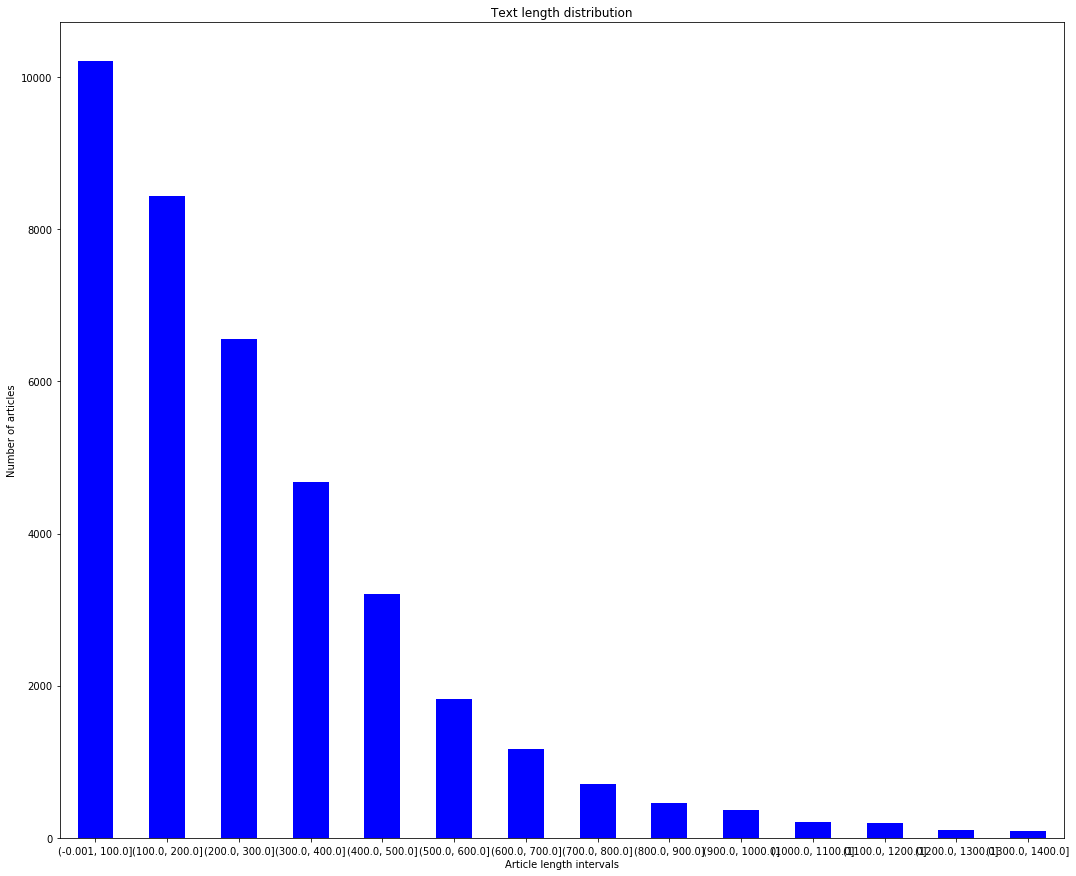

In [46]:
import matplotlib.pyplot as plt
out = pd.cut(a['text_length'], bins=list(range(0,1500,100)), include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(18,15))
plt.ylabel('Number of articles')
plt.xlabel('Article length intervals')
plt.title("Text length distribution")
plt.show()

In [50]:

a["mixed"]= a['lemmatize_text'].apply(lambda x: x.append(a['lemmatize_title']))

/home/meftahzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
a

,title,text,authors,imgs,movies,meta_lang,meta_keywords,htmlfile,url,error,...,subdomain,txt_counts,title_counts,clean_text,clean_title,lemmatize_text,lemmatize_title,text_length,title_length,mixed
0,Here’s a full list of the 23 Friendly’s locati...,Friendly’s has closed 23 more restaurants arou...,None,[https://www.bostonglobe.com/resizer/thx4EmqY-...,None,en,[],GER_2019-04-08_5182_web_page.html,www.bostonglobe.com/business/2019/04/08/here-f...,NaN,...,www,1,1,"[friendly, closed, restaurants, around, northe...","[full, list, friendly, locations, closing, nor...","[friendly, closed, restaurant, around, northea...","[full, list, friendly, location, closing, nort...",17,8,None
1,She lived for 99 years with organs in all the ...,"(CNN) On an early spring day in 2018, the fain...",[Sandee Lamotte],[http://cdn.cnn.com/cnnnext/dam/assets/1908111...,None,None,"[health, Rose Marie Bentley lived for 99 years...",GER_2019-04-08_5926_web_page.html,www.cnn.com/2019/04/08/health/99-year-old-back...,NaN,...,www,2,2,"[cnn, early, spring, day, faint, smell, formal...","[lived, years, organs, wrong, places, never, k...","[cnn, early, spring, day, faint, smell, formal...","[lived, year, organ, wrong, place, never, knew]",679,7,None
2,Scientists just captured a record 17-foot-long...,(CNN) The Burmese python is one of the largest...,[Chandrika Narayan],[http://cdn.cnn.com/cnnnext/dam/assets/1906101...,None,None,"[travel, Python captured in Florida sets a rec...",GER_2019-04-08_5927_web_page.html,www.cnn.com/2019/04/07/us/florida-huge-python-...,NaN,...,www,3,3,"[cnn, burmese, python, one, largest, snakes, w...","[scientists, captured, record, foot, long, pyt...","[cnn, burmese, python, one, largest, snake, wo...","[scientist, captured, record, foot, long, pyth...",51,7,None
3,Jennifer Hart drove family off a cliff as her ...,(CNN) As a drunk Jennifer Hart drove her six a...,"[Madeline Holcombe, Augie Martin]",[https://cdn.cnn.com/cnnnext/dam/assets/180328...,None,None,"[us, Jennifer Hart drove family off a cliff as...",GER_2019-04-08_5928_web_page.html,www.cnn.com/2019/04/06/us/hart-family-crash-in...,NaN,...,www,4,4,"[cnn, drunk, jennifer, hart, drove, six, adopt...","[jennifer, hart, drove, family, cliff, wife, l...","[cnn, drunk, jennifer, hart, drove, six, adopt...","[jennifer, hart, drove, family, cliff, wife, l...",540,12,None
4,Timmothy Pitzen's dad hopes news about his mis...,(CNN) Reports that missing boy Timmothy Pitzen...,[Joe Sterling],[http://cdn.cnn.com/cnnnext/dam/assets/1904080...,None,None,"[us, Timmothy Pitzen's dad hopes news about hi...",GER_2019-04-08_5929_web_page.html,www.cnn.com/2019/04/08/us/timmothy-pitzen-case...,NaN,...,www,1,1,"[cnn, reports, missing, boy, timmothy, pitzen,...","[timmothy, pitzen, dad, hopes, news, missing, ...","[cnn, report, missing, boy, timmothy, pitzen, ...","[timmothy, pitzen, dad, hope, news, missing, s...",81,11,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,"Suspects offered $8K for hit on David Ortiz, a...","A group of crooks were offered $8,000 USD to k...",[June],[https://thenypost.files.wordpress.com/2019/06...,None,en,"[Sports, david ortiz, dominican republic, shoo...",GER_2019-06-15_5995_mobile_.html,nypost.com/2019/06/12/crooks-offered-8k-for-hi...,NaN,...,,1,1,"[group, crooks, offered, usd, kill, former, re...","[suspects, offered, k, hit, david, ortiz, alle...","[group, crook, offered, usd, kill, former, red...","[suspect, offered, k, hit, david, ortiz, alleg...",147,9,None
38744,Newsweek Subscribe,- Countries - Afghanistan Aland Islands Albani...,None,[https://gc.newsweek.com/subscription/images/i...,None,None,[],GER_2019-06-15_6301_mobile_.html,subscription.newsweek.com/,NaN,...,subscription,1,1,"[countries, afghanistan, aland, islands, alban...","[newsweek, subscribe]","[country, afghanistan, aland, island, albania,...","[newsweek, subscribe]",318,2,None
38745,Sean Hannity: Sources say DOJ inspector genera...,Fox News host Sean 